# Erstes Notenbonus-Quiz

In [25]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Erster Teil

In [26]:
data1 = np.loadtxt('data_exp.txt', comments='#', delimiter=',')
t = data1[:, 0]
y = data1[:, 1]

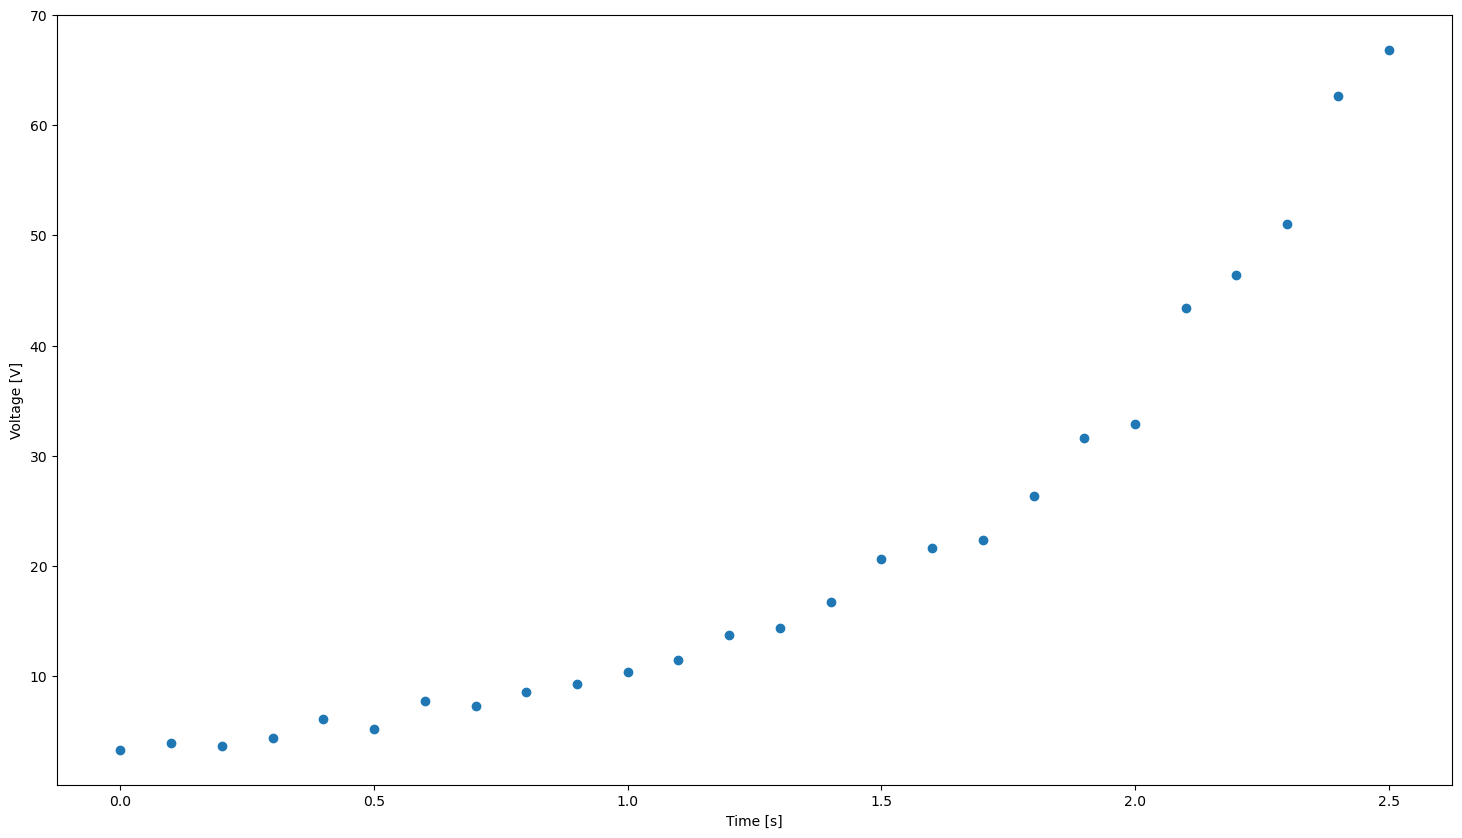

In [27]:
_, ax = plt.subplots(figsize=(18,10))
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')
ax.plot(t, y, 'o')

In [28]:
def my_fit(x, y, sigma, m):
    N = np.zeros((m,m))
    Y = np.zeros(m)
    
    for i in range(m):
        Y[i] = np.sum(y*x**i/sigma**2)
        for j in range(m):
            N[i,j] = np.sum(x**(i+j)/sigma**2)
    
    return np.linalg.inv(N)@Y

def calculate_fit_func(data, fit):
    res = 0
    for i in range(len(fit)):
        res += fit[i] * data**i
    return res

def my_fit_func(x, y, sigma, m):
    return calculate_fit_func(x, my_fit(x, y, sigma, m))

In [29]:
def model(x, A, l):
    return A * np.exp(l * x)

In [30]:
print(f'Own fit:   {my_fit(t, np.log(y), 1/y, 2)[::-1]}')

A, l = sp.optimize.curve_fit(model, t, y, (3, 1))[0]
print(f'Scipy fit: {np.array((A, l))}')

Own fit:   [1.25676002 1.07369637]
Scipy fit: [2.87296269 1.26373276]


(array([2.87296269, 1.26373276]), array([[ 0.02495117, -0.00390566],
       [-0.00390566,  0.00063059]]))


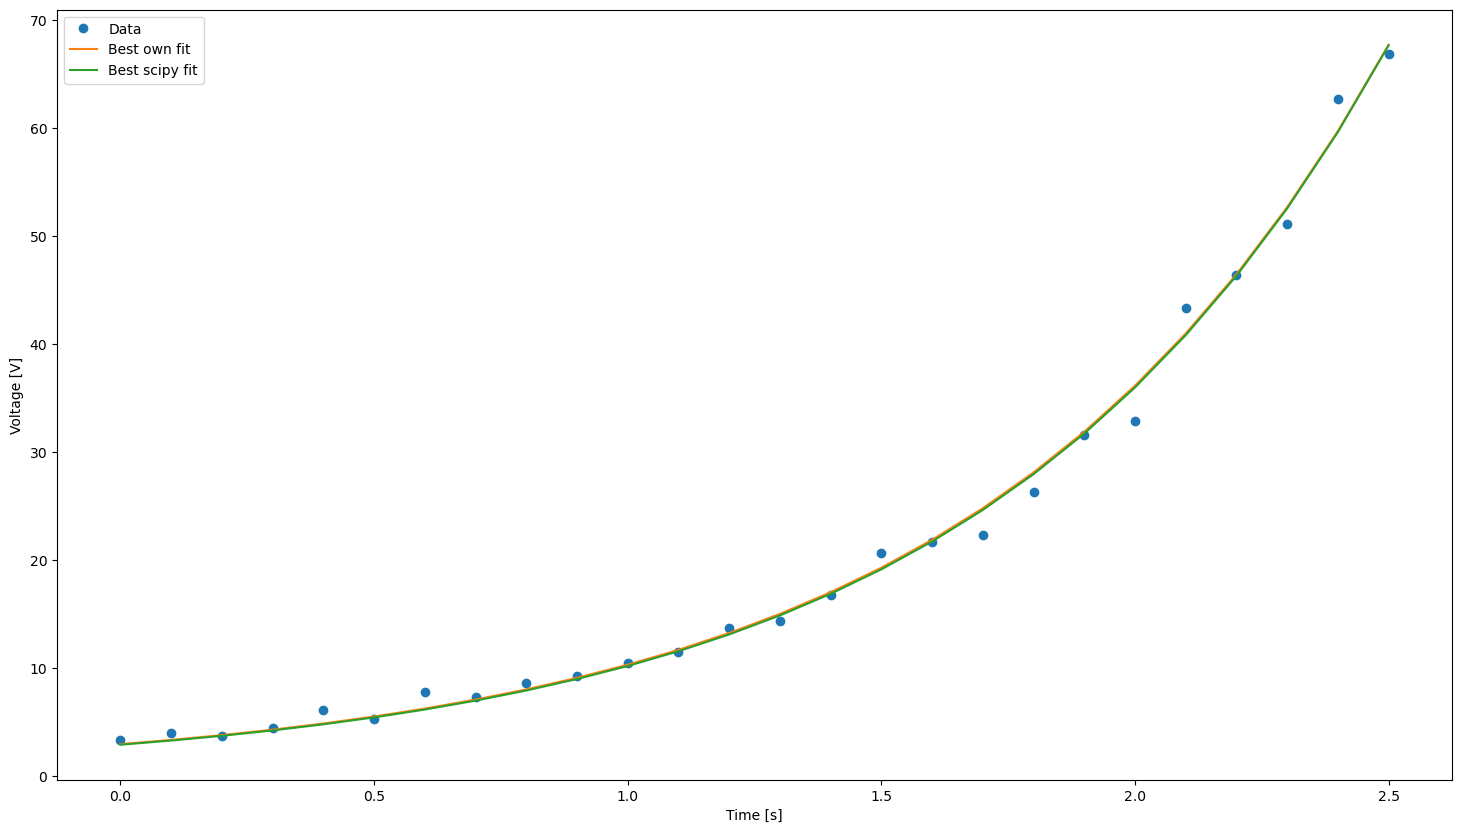

In [31]:
print(sp.optimize.curve_fit(model, t, y, (3, 1)))

A, l = sp.optimize.curve_fit(model, t, y, (3, 1))[0]

_, ax = plt.subplots(figsize=(18,10))
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')
ax.plot(t, y, 'o', label='Data')
#ax.plot(t, np.exp(my_fit_func(t, np.log(y), np.ones(len(t)), 2)), label='Best own fit')
ax.plot(t, np.exp(my_fit_func(t, np.log(y), 1/y, 2)), label='Best own fit')
ax.plot(t, model(t, A, l), label='Best scipy fit')
ax.legend()

## Zweiter Teil

In [32]:
data2 = np.loadtxt('data_res.txt', comments='#', delimiter=',')
T = data2[:, 0]
R = data2[:, 1]
delta_R = data2[:, 2]

<ErrorbarContainer object of 3 artists>

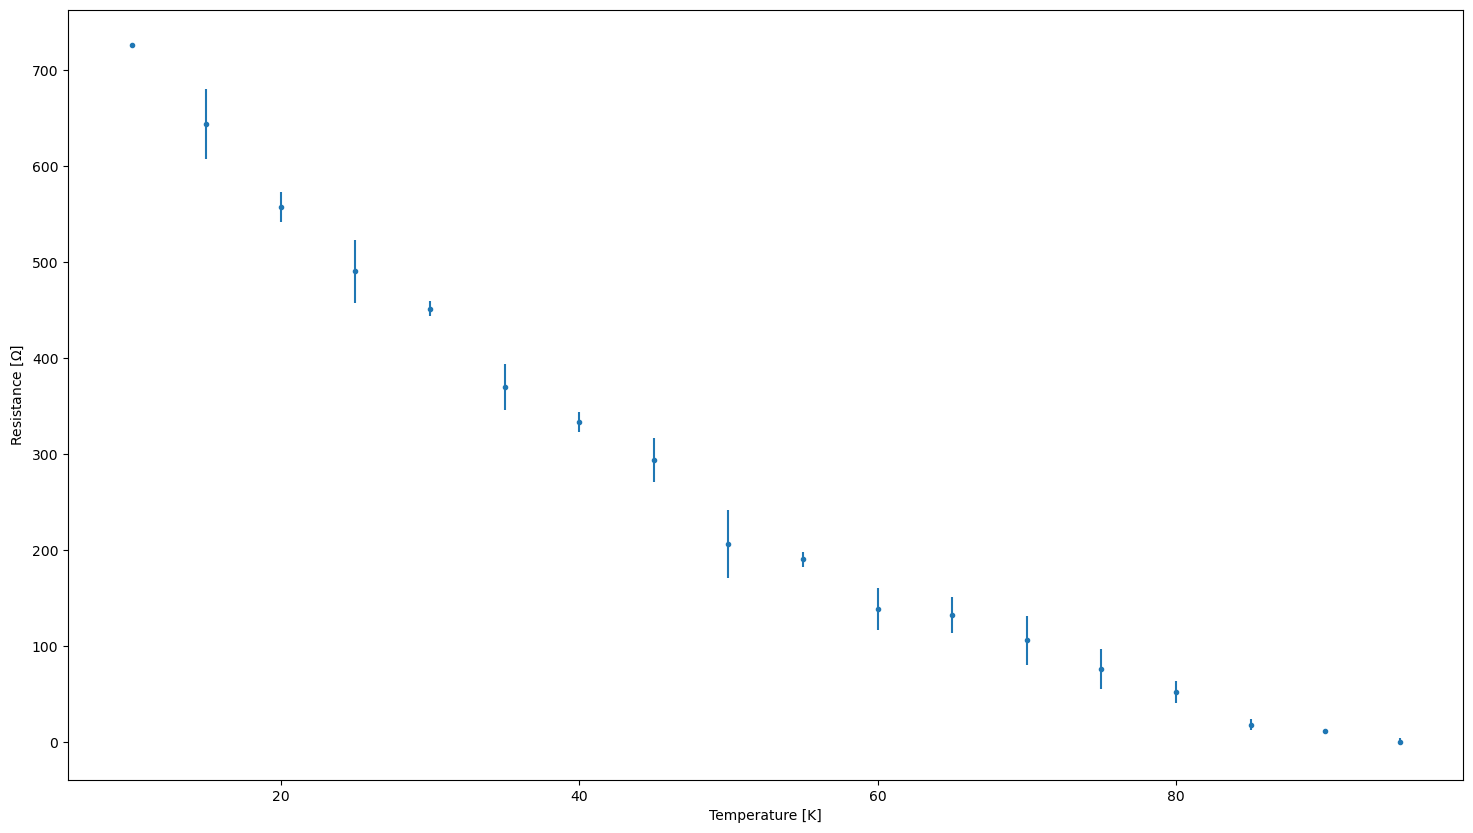

In [33]:
_, ax = plt.subplots(figsize=(18,10))
ax.set_xlabel('Temperature [K]')
ax.set_ylabel(r'Resistance [$\Omega$]')
ax.errorbar(T, R, delta_R, fmt='.')

In [34]:
def model2(x, a, b, c):
    return a*x**2 + b*x + c

In [35]:
print(f'Own fit:   {my_fit(T, R, delta_R, 3)[::-1]}')

a, b, c = sp.optimize.curve_fit(model2, T, R, (0.1, -20, 900), delta_R)[0]
cov = sp.optimize.curve_fit(model2, T, R, (0.1, -20, 900), delta_R)[1]
print(f'Scipy fit: {np.array((a, b, c))}')
print(f'Scipy std: {np.sqrt(np.diagonal(cov))}')

Own fit:   [ 8.34117973e-02 -1.72881205e+01  8.90882063e+02]
Scipy fit: [ 8.34117974e-02 -1.72881206e+01  8.90882063e+02]
Scipy std: [0.0019535  0.19535269 1.75843256]


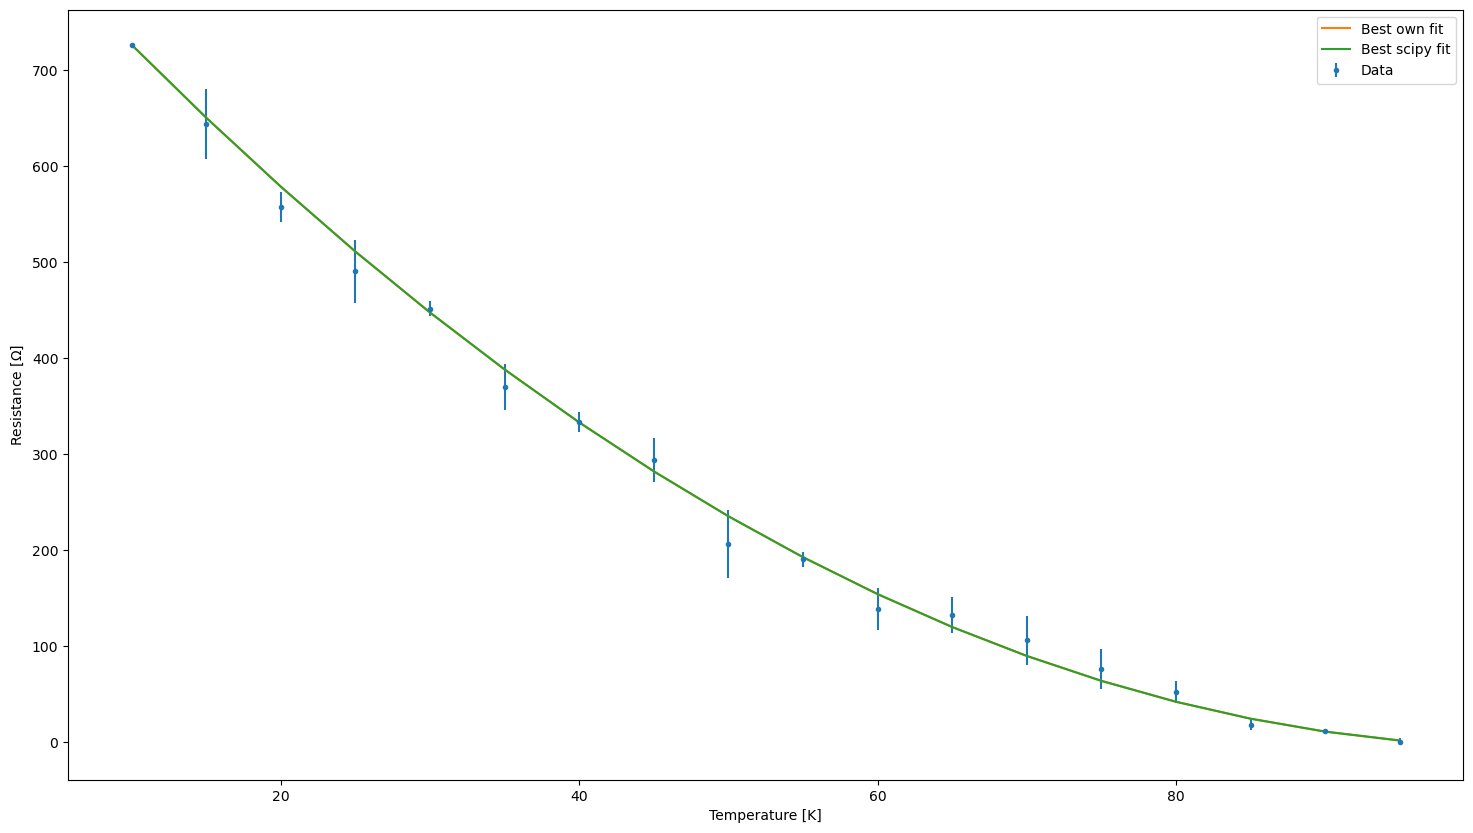

In [36]:
_, ax = plt.subplots(figsize=(18,10))
ax.set_xlabel('Temperature [K]')
ax.set_ylabel(r'Resistance [$\Omega$]')
ax.errorbar(T, R, delta_R, fmt='.', label='Data')
ax.plot(T, my_fit_func(T, R, delta_R, 3), label='Best own fit')
ax.plot(T, model2(T, a, b, c), label='Best scipy fit')
ax.legend()